In [2]:
import torch
x = torch.Tensor([[1, 2],[3, 4]])
print(x)
x.size()

tensor([[1., 2.],
        [3., 4.]])


torch.Size([2, 2])

In [95]:
x = torch.rand(1, 1, 2, 3)
print(x)
patch_size = 3
n, c, h, w = x.size()
step = patch_size//2
print(step)
y = torch.zeros(n, c, h + 2*step, w + 2*step)
y[:, :, step:step+h, step:step+w] = x
y[:, :, step:step+h,:step] = x[:, :, :,0:1].expand((n, c, h,step))
y[:, :, step:step+h,step+w:step+2*w] = x[:, :, :,-1:w+2*step].expand((n, c, h,step))
y[:, :, :step, :] = y[:, :, step:step+1,:].expand((n, c, step, w+2*step))
y[:, :, h+step:, :] = y[:, :, h+step-1:h+step,:].expand((n, c, step, w+2*step))
print(y)

tensor([[[[0.0759, 0.4449, 0.9818],
          [0.9194, 0.8485, 0.7078]]]])
1
tensor([[[[0.0759, 0.0759, 0.4449, 0.9818, 0.9818],
          [0.0759, 0.0759, 0.4449, 0.9818, 0.9818],
          [0.9194, 0.9194, 0.8485, 0.7078, 0.7078],
          [0.9194, 0.9194, 0.8485, 0.7078, 0.7078]]]])


In [96]:
ex_feat = torch.zeros(n, c, patch_size*patch_size, h, w) #extended feature map
# build feat tensor for flann
for i in range(patch_size):
    for j in range(patch_size):
        pn = i * patch_size + j
        ex_feat[:, :, pn, :, :] = y[:, :, i:i+h, j:j+w]
ex_feat

tensor([[[[[0.0759, 0.0759, 0.4449],
           [0.0759, 0.0759, 0.4449]],

          [[0.0759, 0.4449, 0.9818],
           [0.0759, 0.4449, 0.9818]],

          [[0.4449, 0.9818, 0.9818],
           [0.4449, 0.9818, 0.9818]],

          [[0.0759, 0.0759, 0.4449],
           [0.9194, 0.9194, 0.8485]],

          [[0.0759, 0.4449, 0.9818],
           [0.9194, 0.8485, 0.7078]],

          [[0.4449, 0.9818, 0.9818],
           [0.8485, 0.7078, 0.7078]],

          [[0.9194, 0.9194, 0.8485],
           [0.9194, 0.9194, 0.8485]],

          [[0.9194, 0.8485, 0.7078],
           [0.9194, 0.8485, 0.7078]],

          [[0.8485, 0.7078, 0.7078],
           [0.8485, 0.7078, 0.7078]]]]])

In [97]:
z1 = ex_feat.reshape((n, c * patch_size * patch_size, h, w))
z2 = z1.reshape((n, c*patch_size*patch_size, h*w))
print(z1)
print(z2)

tensor([[[[0.0759, 0.0759, 0.4449],
          [0.0759, 0.0759, 0.4449]],

         [[0.0759, 0.4449, 0.9818],
          [0.0759, 0.4449, 0.9818]],

         [[0.4449, 0.9818, 0.9818],
          [0.4449, 0.9818, 0.9818]],

         [[0.0759, 0.0759, 0.4449],
          [0.9194, 0.9194, 0.8485]],

         [[0.0759, 0.4449, 0.9818],
          [0.9194, 0.8485, 0.7078]],

         [[0.4449, 0.9818, 0.9818],
          [0.8485, 0.7078, 0.7078]],

         [[0.9194, 0.9194, 0.8485],
          [0.9194, 0.9194, 0.8485]],

         [[0.9194, 0.8485, 0.7078],
          [0.9194, 0.8485, 0.7078]],

         [[0.8485, 0.7078, 0.7078],
          [0.8485, 0.7078, 0.7078]]]])
tensor([[[0.0759, 0.0759, 0.4449, 0.0759, 0.0759, 0.4449],
         [0.0759, 0.4449, 0.9818, 0.0759, 0.4449, 0.9818],
         [0.4449, 0.9818, 0.9818, 0.4449, 0.9818, 0.9818],
         [0.0759, 0.0759, 0.4449, 0.9194, 0.9194, 0.8485],
         [0.0759, 0.4449, 0.9818, 0.9194, 0.8485, 0.7078],
         [0.4449, 0.9818, 0.9818, 0.84

In [66]:
torch.zeros((n, 2, h, w), dtype=int)

tensor([[[[0, 0, 0, 0],
          [0, 0, 0, 0],
          [0, 0, 0, 0],
          [0, 0, 0, 0]],

         [[0, 0, 0, 0],
          [0, 0, 0, 0],
          [0, 0, 0, 0],
          [0, 0, 0, 0]]]])

In [101]:
import numpy as np

a = np.arange(6)
a

array([0, 1, 2, 3, 4, 5])

In [104]:
a.reshape(2, 3)

array([[0, 1, 2],
       [3, 4, 5]])

In [107]:
print(a//2)
print(a%2)

[0 0 1 1 2 2]
[0 1 0 1 0 1]


In [129]:
import torchvision
from PIL import Image
import matplotlib.pyplot as plt
device = 'cpu'
vgg19 = torchvision.models.vgg19(pretrained=True).to(device)

In [130]:
def get_feature(vgg19, img_tensor, feature_id):
    feature_tensor = vgg19.features[:feature_id](img_tensor)
    return feature_tensor


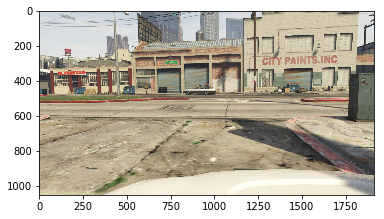

In [131]:
image = Image.open("./test_images/00003.png").convert("RGB")
image = np.array(image)
plt.imshow(image)

In [ ]:
image_tensor = torch.from_numpy(image.transpose((2,0,1))).unsqueeze(0).to(device)
feat = get_feature(vgg19, image_tensor.float(), 29)

In [164]:
feat_np = feat[0,:,:,:].detach().numpy().transpose((1,2,0))
feat_np = feat_np / np.linalg.norm(feat_np, axis=2, keepdims = True)

In [169]:
print(image_tensor.size())
print(feat.size())
print(feat_np.shape)

torch.Size([1, 3, 1052, 1914])
torch.Size([1, 512, 65, 119])
(65, 119, 512)


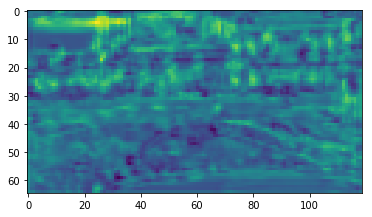

In [168]:
plt.imshow(feat_np[:,:,1])

In [6]:
label = torch.Tensor([[0,1],[1,2]]).long()
label = label.unsqueeze(0)
label

tensor([[[0, 1],
         [1, 2]]])

In [7]:
p = torch.zeros(1,3,2,2)
for c in range(3):
    p[:,c,:,:][label==c]=1
p

tensor([[[[1., 0.],
          [0., 0.]],

         [[0., 1.],
          [1., 0.]],

         [[0., 0.],
          [0., 1.]]]])

In [9]:
p_norm = torch.norm(p, dim=1)

tensor([[[1., 1.],
         [1., 1.]]])